In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/Users/sanhorn/Desktop/Internships/Econ Data Lab/IFLS4 Dataset/Data/b3a_tk3.csv")
df

,hhid07_9,pid07,tk28year,tk28,tk30x,tk31x,tk31,tk32x,tk32,tk33,tk33pid,tk33a,hhid07,pidlink,occ2007,tk31a,version,module
0,1220000,1,2007,1,1.0,1.0,GETAH KARET,1.0,BERTANI KARET,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
1,1220000,1,2006,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
2,1220000,1,2005,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
3,1220000,1,2004,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
4,1220000,1,2003,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209200,321300000,2,2003,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209201,321300000,2,2002,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209202,321300000,2,2001,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209203,321300000,2,2000,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3


In [4]:
tmp_df = df.copy()
selected_columns = ["hhid07_9", "pid07", "tk28year", "tk28", "tk31a"]
tmp_df = tmp_df[selected_columns]

tmp_df["person"] = tmp_df["hhid07_9"].astype(str) + tmp_df["pid07"].astype(str)
tmp_df = tmp_df.drop(columns = ["hhid07_9", "pid07"])
tmp_df

,tk28year,tk28,tk31a,person
0,2007,1,1.0,12200001
1,2006,1,1.0,12200001
2,2005,1,1.0,12200001
3,2004,1,1.0,12200001
4,2003,1,1.0,12200001
...,...,...,...,...
209200,2003,1,9.0,3213000002
209201,2002,1,9.0,3213000002
209202,2001,1,9.0,3213000002
209203,2000,1,9.0,3213000002


In [5]:
print("tk31a NaN number: " + str(len(tmp_df[tmp_df["tk31a"].isna()])))
print("tk28 doesn't have job number: " + str(len(tmp_df[tmp_df["tk28"] != 1])))

tk31a NaN number: 52608
tk28 doesn't have job number: 52608


In [6]:
mapping = {
    1: "Agriculture, forestry, fishing and hunting",
    2: "Mining and quarrying",
    3: "Manufacturing",
    4: "Electricity, gas, water",
    5: "Construction",
    6: "Wholesale, retail, restaurants and hotels",
    7: "Transportation, storage and communications",
    8: "Finance, insurance, real estate and business services",
    9: "Social services",
    10: "Activities that cannot be classified"
}

In [7]:
df1 = tmp_df.copy()

years = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']
sector_dfs = {}
for i in range(1, 11):
    sector_dfs[i] = pd.DataFrame(columns=years)

no_job_df = pd.DataFrame(columns=years)

for _, row in df1.iterrows():
    year = str(row["tk28year"])
    person_id = str(row["person"])
    person_hasJob = row["tk28"]

    if person_hasJob == 1:
        sector = int(row["tk31a"])

        if sector in sector_dfs:
            if year in sector_dfs[sector].columns:
                if sector_dfs[sector].empty:
                    sector_dfs[sector].loc[0] = [[] for _ in range(len(years))]
                curr = sector_dfs[sector].at[0, year]
                if isinstance(curr, list): curr.append(person_id)
                else: curr = [person_id]

                sector_dfs[sector].at[0, year] = curr

    if person_hasJob != 1:
        if no_job_df.empty:
            no_job_df.loc[0] = [[] for _ in range(len(years))]
        
        curr = no_job_df.at[0, year]
        if isinstance(curr, list): curr.append(person_id)
        else: curr = [person_id]

        no_job_df.at[0, year] = curr

len(sector_dfs[2]["2000"][0])

97

In [8]:
import pandas as pd

# Initialize the table with sector names and "No Job" for the y-axis
table_data = {year: [] for year in years}
sector_names = [mapping[i] for i in range(1, 11)] + ["No Job"]

# Populate the table with lengths of lists in sector_dfs
for i in range(1, 11):
    for year in years:
        if not sector_dfs[i].empty and year in sector_dfs[i].columns:
            table_data[year].append(len(sector_dfs[i].at[0, year]))
        else:
            table_data[year].append(0)

# Add lengths of lists in no_job_df
for year in years:
    if not no_job_df.empty and year in no_job_df.columns:
        table_data[year].append(len(no_job_df.at[0, year]))
    else:
        table_data[year].append(0)

# Create the DataFrame
result_table = pd.DataFrame(table_data, index=sector_names)
result_table

,1999,2000,2001,2002,2003,2004,2005,2006,2007
"Agriculture, forestry, fishing and hunting",5695,5836,5939,6057,6212,6337,6459,6582,5776
Mining and quarrying,93,97,102,107,111,116,125,127,104
Manufacturing,2032,2167,2273,2379,2514,2627,2736,2869,2535
"Electricity, gas, water",42,43,48,53,58,60,62,62,53
Construction,753,799,819,848,884,914,946,972,861
"Wholesale, retail, restaurants and hotels",2990,3172,3328,3526,3725,3949,4154,4434,4015
"Transportation, storage and communications",542,569,591,605,629,649,658,682,561
"Finance, insurance, real estate and business services",90,93,103,114,120,126,132,141,126
Social services,2750,2929,3042,3208,3423,3597,3794,3979,3551
Activities that cannot be classified,1,1,2,2,2,2,3,3,3


In [9]:
column_sums = result_table.sum(axis=0)
column_sums

1999    23227
2000    23227
2001    23224
2002    23223
2003    23224
2004    23221
2005    23220
2006    23219
2007    23223
dtype: int64

In [10]:
# Calculate the average version of result_table
average_result_table = result_table.div(result_table.sum(axis=0), axis=1)
average_result_table

,1999,2000,2001,2002,2003,2004,2005,2006,2007
"Agriculture, forestry, fishing and hunting",0.245189,0.251259,0.255727,0.260819,0.267482,0.272900,0.278165,0.283475,0.248719
Mining and quarrying,0.004004,0.004176,0.004392,0.004608,0.004780,0.004995,0.005383,0.005470,0.004478
Manufacturing,0.087484,0.093297,0.097873,0.102442,0.108250,0.113130,0.117829,0.123563,0.109159
"Electricity, gas, water",0.001808,0.001851,0.002067,0.002282,0.002497,0.002584,0.002670,0.002670,0.002282
Construction,0.032419,0.034400,0.035265,0.036516,0.038064,0.039361,0.040741,0.041862,0.037075
"Wholesale, retail, restaurants and hotels",0.128729,0.136565,0.143300,0.151832,0.160394,0.170062,0.178898,0.190964,0.172889
"Transportation, storage and communications",0.023335,0.024497,0.025448,0.026052,0.027084,0.027949,0.028338,0.029372,0.024157
"Finance, insurance, real estate and business services",0.003875,0.004004,0.004435,0.004909,0.005167,0.005426,0.005685,0.006073,0.005426
Social services,0.118397,0.126103,0.130985,0.138139,0.147391,0.154903,0.163394,0.171368,0.152909
Activities that cannot be classified,0.000043,0.000043,0.000086,0.000086,0.000086,0.000086,0.000129,0.000129,0.000129


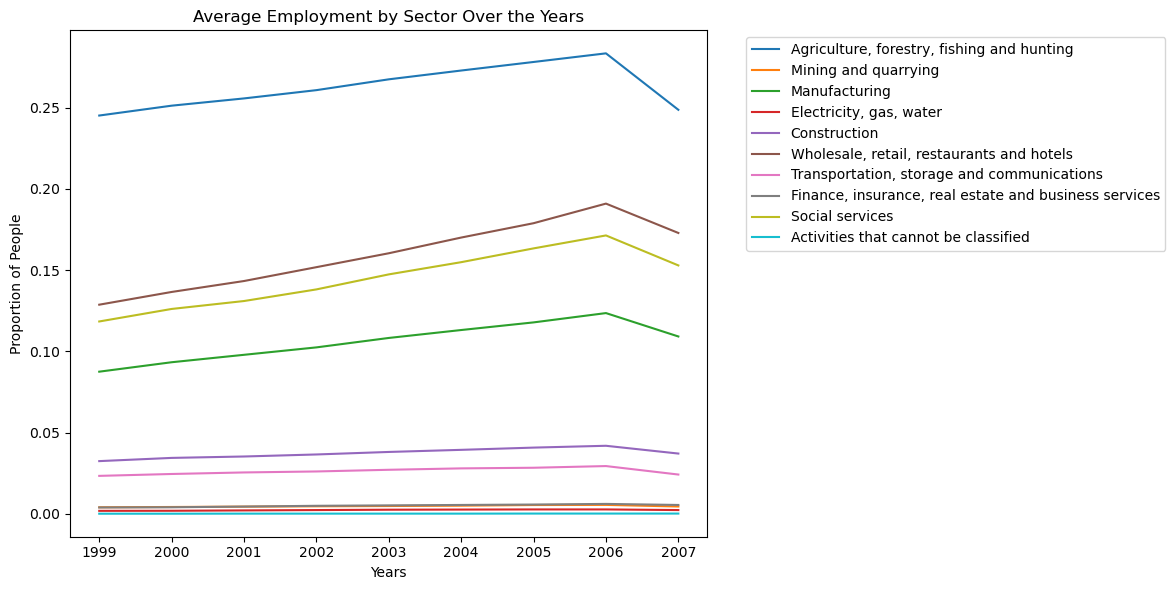

In [11]:
import matplotlib.pyplot as plt

# Plot for all sectors excluding "No Job"
plt.figure(figsize=(12, 6))
for sector in sector_names[:-1]:  # Exclude "No Job"
    plt.plot(years, average_result_table.loc[sector], label=sector)
plt.title("Average Employment by Sector Over the Years")
plt.xlabel("Years")
plt.ylabel("Proportion of People")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

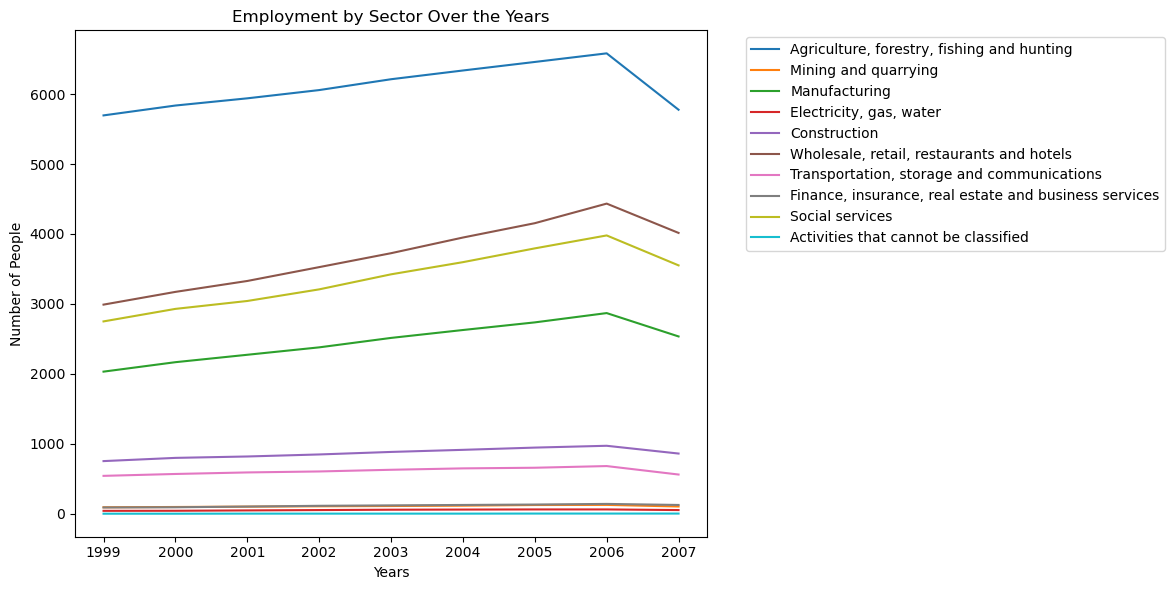

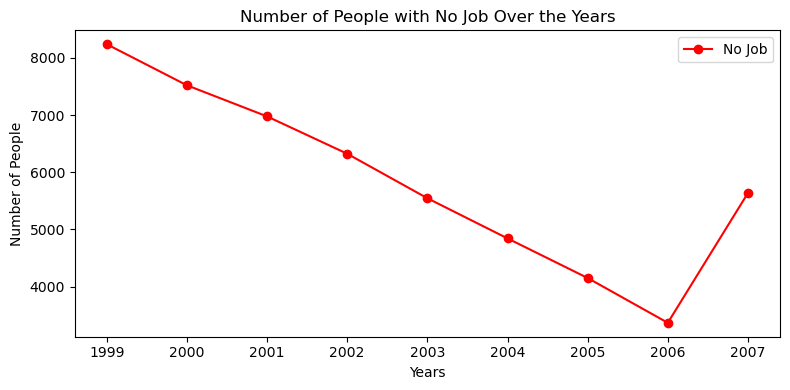

In [15]:
import matplotlib.pyplot as plt

# Plot for all sectors
plt.figure(figsize=(12, 6))
for sector in sector_names[:-1]:  # Exclude "No Job"
    plt.plot(years, result_table.loc[sector], label=sector)
plt.title("Employment by Sector Over the Years")
plt.xlabel("Years")
plt.ylabel("Number of People")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot for "No Job"
plt.figure(figsize=(8, 4))
plt.plot(years, result_table.loc["No Job"], label="No Job", color='red', marker='o')
plt.title("Number of People with No Job Over the Years")
plt.xlabel("Years")
plt.ylabel("Number of People")
plt.legend()
plt.tight_layout()
plt.show()